# **Proyecto Final Data Science - Fabrizio A. Sgro - Julio de 2023.**

![Portada proyecto final](portada.png)


## **Bank Marketing Data Set**

**Fuente:** [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## 1. Variables del dataset
### Datos de los clientes del banco:
1.  `Edad`: Entero.
2.  `Trabajo`: Tipo de trabajo (categórico).
3.  `Estado civil`: Casado, divorciado, soltero. (divorciado aplica también para viudo/a). 
4.  `Nivel de educación`: Categórico (categórico con diferentes niveles de educación).
5.  `Default`: ¿Tiene credito en default? (categórico "Yes" o "No").
6.  `Hipoteca`: ¿Tiene hipoteca? (categorico "No","Yes",'desconocido').
7.  `Préstamo personal`: ¿Tiene préstamos personal? (categorico "No","Yes","Desconocido").
### Relacionado con el último conctacto con la campaña activa:
8.  `Contacto`: Tipo de contacto (categorico 'cellular' o 'telephone').
9.  `Mes`: Último mes en el que se contactó al cliente (categórico, enero, feb, mar, etc.) 
10. `Dia`: Último día en el que se contactó al cliente (variable continua) 
11. `Duración`: Duración del último contacto en segundos (entero). No se tendrá en cuenta para el desarrollo del modelo predicitivo. 
### Otros atributos o variables:
12.  `Campaña`: Número de contactos realizados durante la campaña para cada cliente (entero e incluye el útimo contacto).
13.  `Dia_p`: Número de días que pasaron después de que el cliente fue contactado entre campaña y campaña (Entero. 999 significa que el cliente no fue previamente contactado).
14.  `Previo`: Número de contactos realizados antes de esta campaña para cada cliente (Entero)
15.  `Previo_result`: Resultado de la campaña de marketing previa (categorico: 'fracaso','no existente','exito')


### Variable a predecir:
16.  `y` - ¿El cliente ha realizado un plazo fijo? Binario: Sí o No. 

## 2. Abstracto 

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo es predecir si el cliente realizará un plazo fijo en el futuro. 

Esto se debe a que el banco quiere maximizar el retorno de inversión que realiza en sus campañas de marketing directo. Si logramos identificar y predecir aquellos consumidores con mayor capacidad de realizar un plazo fijo. Le podríamos ahorrar mucho tiempo y dinero al departamento de marketing directo y telemarketing. Ya que sus llamadas estarían mejor segmentadas y tendrían mayor probabilidad de ser exitosas gracias al análisis de datos y el modelo que se necesita implementar.

Me motiva mucho el análisis de este dataset ya que me permite manejar variables que entiendo por haber estudiado marketing y por otro lado, este dataset podría permitirme la implementación de dos tipos de modelos, supervisado si lo que queremos es lograr predecir la posibilidad de que un consumidor haga un plazo fijo, el actual objetivo. Y una posible alternativa, la identificación y agrupamiento de sectores de consumidores con mayor y menos probabilidad de realizar un plazo fijo.

## 3. Hipótesis
1. Las personas que no tienen hipotecas ni préstamos personales tienen mayor posibilidad de realizar un plazo fijo.
2. Las personas de entre 18-44 tienen menos probabilidad de realizar un plazo fijo que las personas de entre 45-65.
3. Las personas con mayor nivel de educación tienen más probabilidad de realizar un plazo fijo. 
4. La personas casadas tienen más probabilidad de realizar un plazo fijo que las personas solteras.

## 4. Adquisición de los datos:
### 4.1 Importación de librerías indispensables.

In [288]:
#Tratamiento de datos y lectura de datos
import mysql.connector
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import json 

#Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter
from plotly import graph_objects as go


#Matemáticas y estadísticas
import statsmodels.stats.proportion as prop
import math
from scipy.stats import pointbiserialr


#Modelos de aprendizaje automático
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


#Estandarización y pre procesamiento
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#Selección de variables para modelos de aprendizaje automático
from sklearn.decomposition import PCA


#Pipelines
from sklearn.pipeline import make_pipeline


#Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

#Warnings
import warnings
warnings.filterwarnings("ignore")

#environment variables
from dotenv import load_dotenv
import os



## 4.2 Conexión con la base de datos

> A través de MySQL nos conectamos a la base de datos

In [289]:
load_dotenv() 

True

In [290]:
password =  os.getenv('password')

In [291]:
db = mysql.connector.connect( 
    host="localhost", #la base de datos se encuentra en un entorno local
    user="root", 
    passwd = password,
    database="datascience_final"
    )

In [292]:
cursor = db.cursor() #creamos el cursor

In [293]:
cursor.execute('SELECT * FROM `bank_data`') #Hacemos una consulta SQL para obtener los datos

In [294]:
datos = cursor.fetchall() #Obtenemos todos los datos

In [295]:
columnas = [i[0] for i in cursor.description] #Se procesan las columnas de los datos

df = pd.DataFrame(datos, columns=columnas)

In [296]:
df #Este es el df que vamos a utilizar para Explorar los Datos, seleccionar variables y entrenar los modelos

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no


## 4.3 Análisis exploratorio de Datos

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [298]:
df.isna().sum() #No tenemos NaN en la base de datos

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [299]:
df.duplicated().sum() #No tenemos valores duplicados

0

In [300]:
round(df.describe().T) #Resumen estadístico de variables númericas

,count,mean,std,min,25%,50%,75%,max
age,45211.0,41.0,11.0,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.0,3045.0,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,16.0,8.0,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.0,258.0,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,3.0,3.0,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.0,100.0,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,1.0,2.0,0.0,0.0,0.0,0.0,275.0


**Comentarios:**

*Nuestro primer análisis estadísitico nos indica:*
- El promedio de clientes tienen una edad de 41 años.

- El balance promedio es de 1362 euros (puede no ser descriptiva, por que la desviación estandar es muy elevada, cómo indica JANIO MARTINEZ BACHMANN en https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit).

- Se realizaron 63 campañas en total.

- El promedio de días que trascurren antes de ser contactados por una nueva campaña, desde la anterior, son 40 días.

- El promedio de duración de las llamadas a los clientes está alrededor de los 257 segundos, es decir 4 minutos y 28 segundos. 


> Limpieza de datos para facilitar la visualización de datos

In [301]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no


In [302]:
cursor.execute("UPDATE datascience_final.bank_data SET loan = CASE WHEN loan = 'no' THEN 0 WHEN loan = 'yes' THEN 1 ELSE loan END;")

# Retrieve the updated data
cursor.execute("SELECT * FROM datascience_final.bank_data;")
result = cursor.fetchall()

# Create a DataFrame from the fetched results
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(result, columns=columns)

In [303]:
cursor.execute("UPDATE datascience_final.bank_data SET `default` = CASE WHEN `default` = 'no' THEN 0 WHEN `default` = 'yes' THEN 1 ELSE `default` END;")

# Retrieve the updated data
cursor.execute("SELECT * FROM datascience_final.bank_data;")
result = cursor.fetchall()

# Create a DataFrame from the fetched results
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(result, columns=columns)

In [304]:
cursor.execute("UPDATE datascience_final.bank_data SET housing = CASE WHEN housing = 'no' THEN 0 WHEN housing = 'yes' THEN 1 ELSE housing END;")

# Retrieve the updated data
cursor.execute("SELECT * FROM datascience_final.bank_data;")
result = cursor.fetchall()

# Create a DataFrame from the fetched results
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(result, columns=columns)

In [305]:
df['y'] = df['y'].replace({'no': 0, 'yes': 1})

df.rename(columns={'y': 'p_fijo'}, inplace=True)

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,p_fijo
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


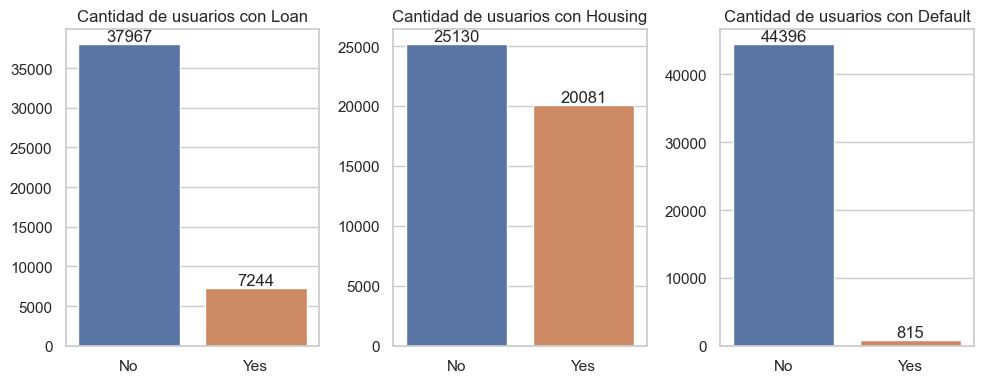

In [306]:
columnas = ['loan', 'housing', 'default']

fig, axes = plt.subplots(nrows=1, ncols=len(columnas), figsize=(10, 4))

for i, column in enumerate(columnas):
    
    column_counts = df[column].value_counts()

    ax = sns.barplot(x=column_counts.index, y=column_counts.values, ax=axes[i])

    ax.set_xticklabels(['No', 'Yes'])

    for j, count in enumerate(column_counts.values):
        ax.annotate(str(count), xy=(j, count), ha='center', va='bottom')

    ax.set_title('Cantidad de usuarios con ' + column.capitalize())

plt.tight_layout()

plt.show()


In [307]:
grouped = df.groupby(['loan', 'housing', 'default']).sum(numeric_only = True)
grouped

age   balance     day  duration  campaign    pdays  \
loan housing default                                                          
0    0       0        735463  29897499  272629   4388726     47884   478242   
             1          8794     -3713    3709     48598       685     1242   
     1       0        801300  26145620  317598   5341267     54979  1075565   
             1         11425    -58825    4617     76096       874     8925   
1    0       0        115079   2189427   43439    675537      8020    47430   
             1          6956    -23871    2863     41950       554      987   
     1       0        166704   3469300   67604   1071402     11507   201442   
             1          5046    -25755    2165     28235       453     3551   

                      previous  p_fijo  
loan housing default                    
0    0       0            8766    3120  
             1              25      15  
     1       0           13555    1648  
             1             109      22  
1    0       0             908     211  
             1              36       8  
     1       0            2789     258  
             1              49       7

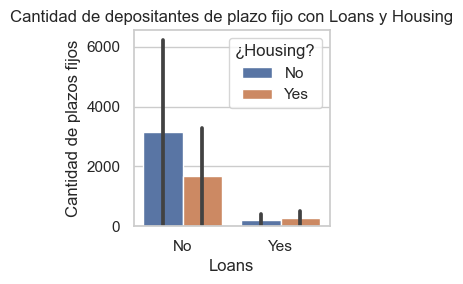

In [308]:
grouped_df = grouped.reset_index()

ax= sns.barplot(x='loan', y='p_fijo', hue='housing', data=grouped_df, estimator=sum)

plt.title('Cantidad de depositantes de plazo fijo con Loans y Housing')
plt.xlabel('Loans')
plt.ylabel('Cantidad de plazos fijos')
ax.set_xticklabels(['No', 'Yes'])

handles, labels = ax.get_legend_handles_labels()
new_labels = ['No', 'Yes']
ax.legend(handles, new_labels, title='¿Housing?')

# Display the plot
plt.show()


Hipotesis Nula: probabilidad de depósito en plazo fijo (`sin loan ni housing`) > (`con loan y con housing`)

Hipótesis Alternativa: probabilidad de depósito en plazo fijo (`sin loan ni housing`) < (`con loan y con housing`)


**Comentarios:**

*En resumen*
- Hipotesis 1: Se acepta la hipótesis de que las personas sin deudas tienen mayor probabilidad de hacer un depósito. Su probabilidad es del 59%.

- La probabilidad de que una persona haga un depósito en plazo fijo con una hipoteca es del 31%.

- La probabilidad de que una persona haga un depósito en plazo fijo con un préstamo es del 3,98%.

- Hay mayor probabilidad de que una persona endeudada haga un depósito si es con hipotéca (housing) que si es con un préstamo personal (loan).

In [309]:
grouped2 = df.groupby(['marital']).sum(numeric_only = True)
grouped2

,age,balance,day,duration,campaign,pdays,previous,p_fijo
marital,,,,,,,,
divorced,238392,6138388,82252,1366927,13699,213496,2871,622
married,1181308,38805139,431464,6896375,77366,1032784,15146,2755
single,431067,16646155,200908,3408509,33891,571104,8220,1912


In [310]:
px.bar(grouped2,x=grouped2.index, y=grouped2.p_fijo, color=grouped2.index, title="Cantidad de plazos fijos por tipo de estado civil", text_auto='.4')

In [311]:
grouped2.p_fijo[1] / grouped2.p_fijo.sum() + grouped2.p_fijo[2] / grouped2.p_fijo.sum()

0.882397428625449

In [312]:
grouped3 = df.groupby(['marital', 'loan', 'housing']).sum(numeric_only = True)
grouped3.reset_index(inplace=True)
grouped3

,marital,loan,housing,age,balance,day,duration,campaign,pdays,previous,p_fijo
0,divorced,0,0,92433,2803371,30446,485408,5027,50083,831,338
1,divorced,0,1,104775,2674557,36795,641005,6126,134981,1635,217
2,divorced,1,0,19475,309963,6888,114718,1179,4926,77,35
3,divorced,1,1,21709,350497,8123,125796,1367,23506,328,32
4,married,0,0,480088,19022929,163718,2605270,29903,262190,4859,1641
5,married,0,1,504627,15894819,192889,3157256,34119,603764,7847,844
6,married,1,0,76596,1362922,27293,403719,5183,29010,560,105
7,married,1,1,119997,2524469,47564,730130,8161,137820,1880,165
8,single,0,0,171736,8067486,82174,1346646,13639,167211,3101,1156
9,single,0,1,203323,7517419,92531,1619102,15608,345745,4182,609


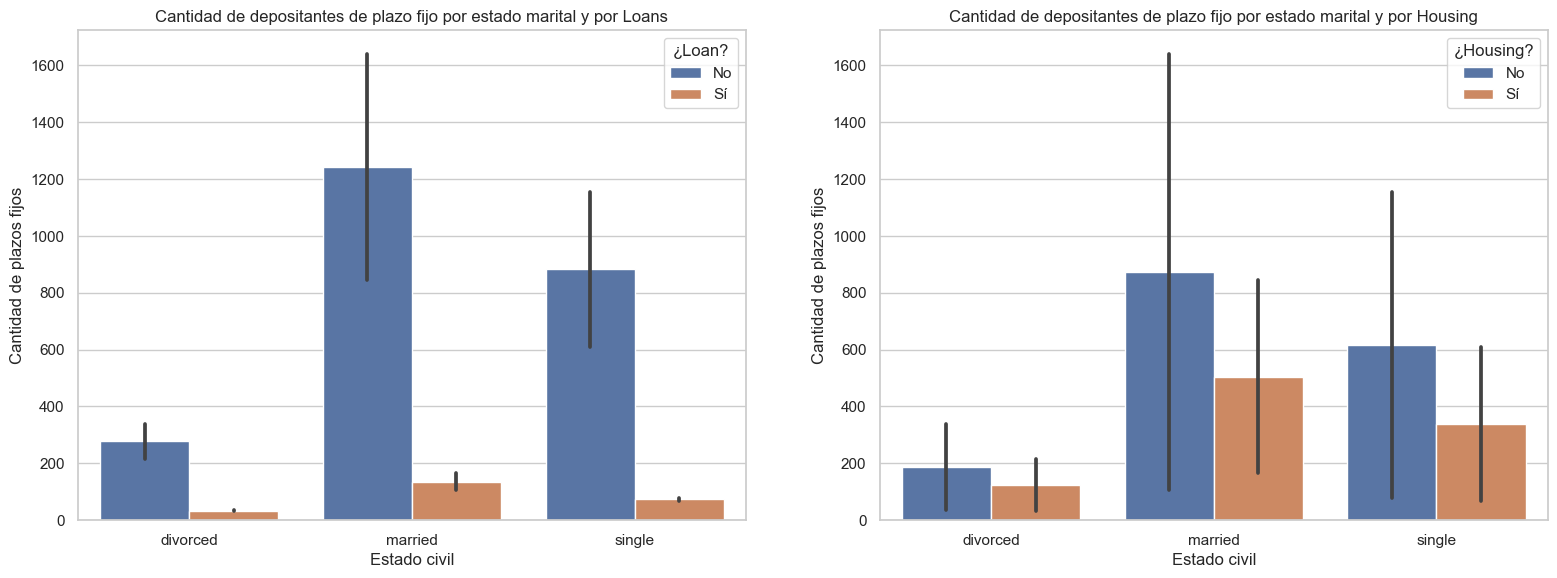

In [313]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1
ax = sns.barplot(x=grouped3.marital, y=grouped3.p_fijo, hue=grouped3['loan'], ax=axs[0])
ax.set_title('Cantidad de depositantes de plazo fijo por estado marital y por Loans')
ax.set_xlabel('Estado civil')
ax.set_ylabel('Cantidad de plazos fijos')

handles, labels = ax.get_legend_handles_labels()
new_labels = ['No', 'Sí']
ax.legend(handles, new_labels, title='¿Loan?')

# Subplot 2: Housing
ax = sns.barplot(x=grouped3.marital, y=grouped3.p_fijo, hue=grouped3['housing'], ax=axs[1])
ax.set_title('Cantidad de depositantes de plazo fijo por estado marital y por Housing')
ax.set_xlabel('Estado civil')
ax.set_ylabel('Cantidad de plazos fijos')

handles, labels = ax.get_legend_handles_labels()
new_labels = ['No', 'Sí']
ax.legend(handles, new_labels, title='¿Housing?')
plt.show()

**Comentarios:**

*En resumen*
- Las personas casadas tienen un 52% de probabilidad de hacer un plazo fijo, las solteras tienen un 36%. Lo que en total nos da un 88% para personas casadas y solteras. El otro 12% corresponde a las divorciadas.

- Esta variable la considero importante usarla mediante probabilidad condicional para conocer el porcentaje con más dimensiones.

- Las personas casadas tienen más cantidad de `housings`, `loans`, `defaults`. La explicación puede deberse a que al estar casadas, buscan el financiamento externo para realizar planes en conjunto (como construcción de una casa).

- Hipótesis 2: Aceptamos la hipótesis porque la probabilidad de depósitos entre personas casadas (52%) > personas solteras (36%).


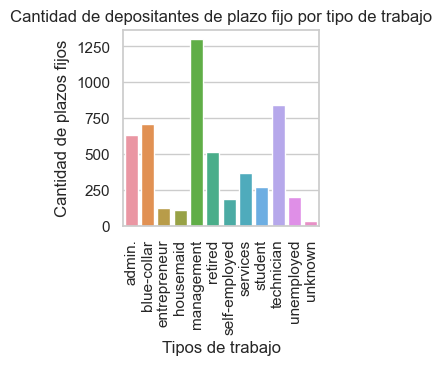

In [314]:
jobs = df.groupby('job').sum()

ax= sns.barplot(x=jobs.index, y=jobs.p_fijo)
ax.set_title('Cantidad de depositantes de plazo fijo por tipo de trabajo')
ax.set_xlabel('Tipos de trabajo')
ax.set_ylabel('Cantidad de plazos fijos')
plt.xticks(rotation=90)
plt.show()


In [315]:
jobs_debts = df.groupby(['job', 'loan', 'housing']).sum(numeric_only = True)
jobs_debts.reset_index(inplace=True)
jobs_debts = jobs_debts.sort_values('p_fijo', ascending=False)
jobs_debts.head()

,job,loan,housing,age,balance,day,duration,campaign,pdays,previous,p_fijo
16,management,0,0,174370,8662706,68521,1080511,12689,129266,2420,829
36,technician,0,0,119863,4137914,50076,734832,9335,66377,1215,461
20,retired,0,0,100252,3689258,24263,472833,3558,62674,1190,453
17,management,0,1,156543,6807516,63505,1016589,10974,194371,3248,380
5,blue-collar,0,1,230954,6068628,90250,1584105,16231,320488,3395,371


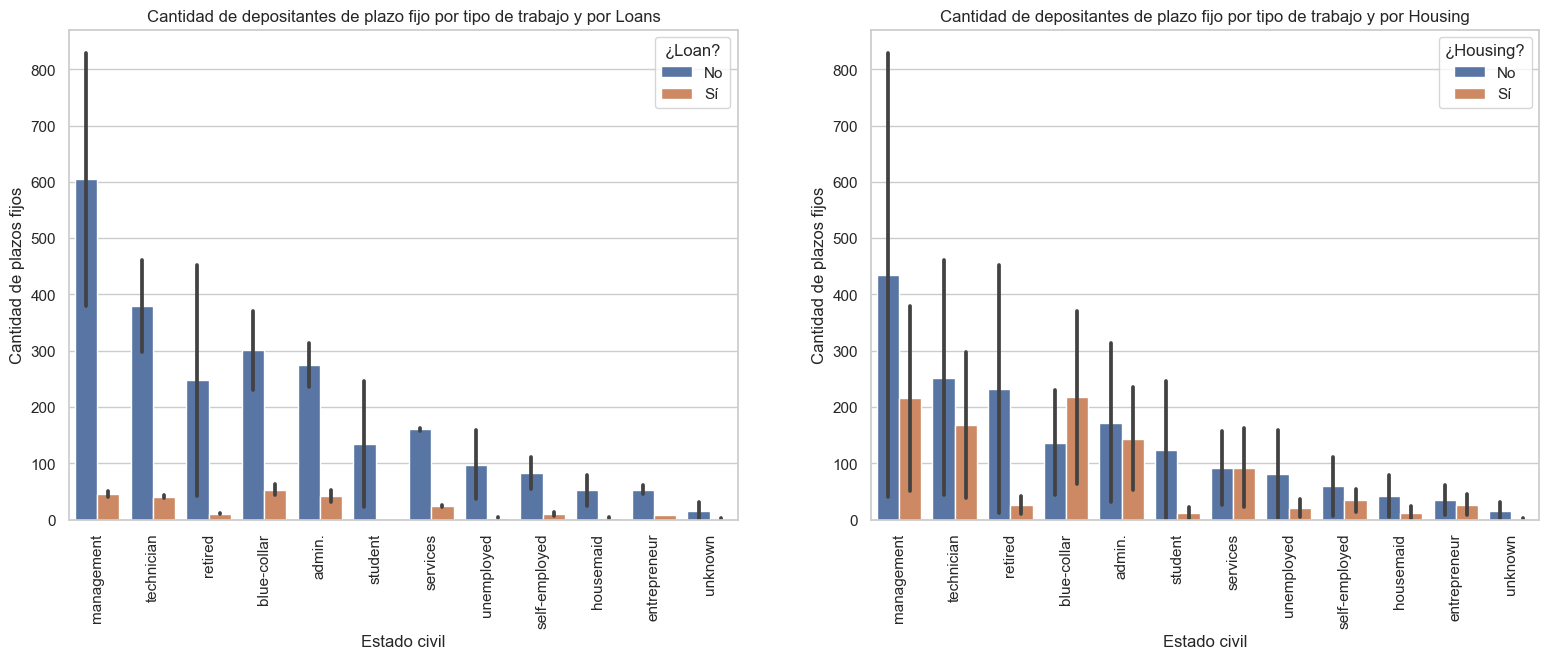

In [316]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
# Subplot 1 Loan
ax = sns.barplot(x=jobs_debts.job, y=jobs_debts.p_fijo, hue=jobs_debts['loan'], ax=axs[0])
ax.set_title('Cantidad de depositantes de plazo fijo por tipo de trabajo y por Loans')
ax.set_xlabel('Estado civil')
ax.set_ylabel('Cantidad de plazos fijos')
handles, labels = ax.get_legend_handles_labels()
new_labels = ['No', 'Sí']
ax.legend(handles, new_labels, title='¿Loan?')

# Subplot 2: Housing
ax = sns.barplot(x=jobs_debts.job, y=jobs_debts.p_fijo, hue=jobs_debts['housing'], ax=axs[1])
ax.set_title('Cantidad de depositantes de plazo fijo por tipo de trabajo y por Housing')
ax.set_xlabel('Estado civil')
ax.set_ylabel('Cantidad de plazos fijos')
handles, labels = ax.get_legend_handles_labels()
new_labels = ['No', 'Sí']
ax.legend(handles, new_labels, title='¿Housing?')
plt.show()

In [317]:
jobs_grouped = df.groupby(['job']).sum(numeric_only = True).sort_values('p_fijo', ascending=False)
total_p_fijo = jobs_grouped['p_fijo'].sum()
jobs_grouped['percentage_p_fijo'] = (jobs_grouped['p_fijo'] / total_p_fijo * 100).round(2)
jobs_grouped.head(6)

,age,balance,day,duration,campaign,pdays,previous,p_fijo,percentage_p_fijo
job,,,,,,,,,
management,382572,16680288,152408,2402292,27091,365698,6318,1301,24.60
technician,298673,9516246,124656,1921319,22083,282571,4365,840,15.88
blue-collar,389709,10499141,150287,2558558,27415,428534,4916,708,13.39
admin.,203168,5873423,80483,1276703,13317,247479,3473,631,11.93
retired,139523,4492263,34955,650586,5313,84773,1446,516,9.76
services,160927,4141904,64950,1077210,11292,174448,2082,369,6.98


In [318]:
round(jobs_grouped.percentage_p_fijo[0:4].sum())

66

**Comentarios:**

*En síntesis:*
- Las personas que trabajan en management tienen un 25% de probabilidades de hacer un depósito en plazo fijo, technician un 16%, blue-collar 13% y administración 12%. Este grupo de personas llegan al total acumulado del 66% del total. 

- Sin embargo hay una diferencia significante entre management y technician. Cuya diferencia no es tan grande con blue-collar y admin.

- Quiero averiguar si esta diferencia se puede estar dando a un mayor balance o a una diferencia en el `nivel educativo`.


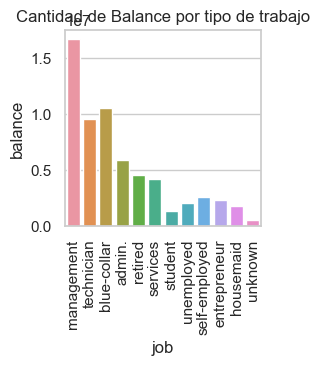

In [319]:
sns.barplot(data=jobs_grouped, x=jobs_grouped.index, y=jobs_grouped.balance).set(title='Cantidad de Balance por tipo de trabajo')
plt.xticks(rotation=90)
plt.show()

In [320]:
job_academic = df.groupby(['education','job']).sum()
job_academic = job_academic.reset_index()
job_academic = job_academic.sort_values('p_fijo', ascending=False)
job_academic.head(5)

,education,job,age,balance,day,duration,campaign,pdays,previous,p_fijo
28,tertiary,management,309980,14306029,126125,1989830,22597,307318,5348,1134
21,secondary,technician,206948,5881175,85970,1300124,15003,197372,2934,518
12,secondary,admin.,165709,4708657,65384,1064399,10914,202834,2786,502
13,secondary,blue-collar,205925,5714177,82708,1443720,14523,249436,2810,433
19,secondary,services,132189,3311338,54038,895119,9362,148640,1765,296


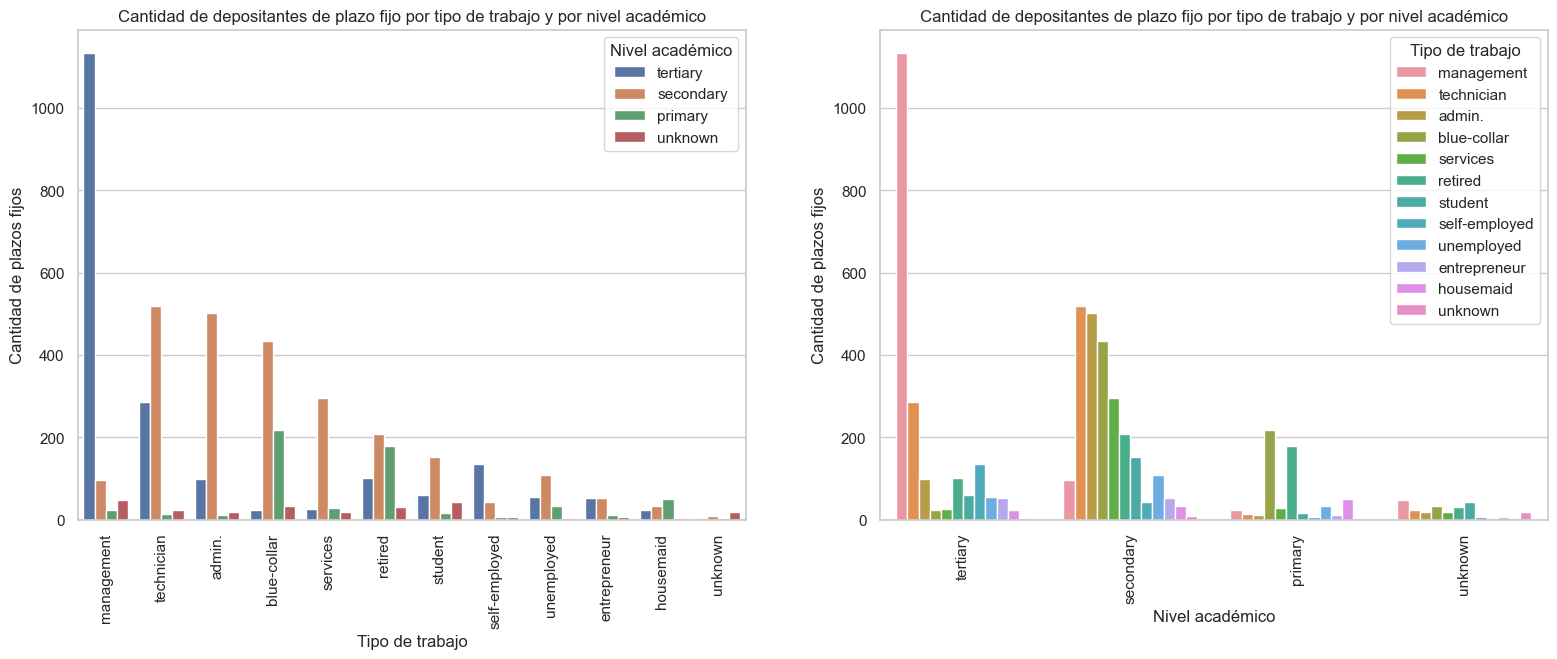

In [321]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
# Subplot 1 tipo de trabajo y nivel académico
ax = sns.barplot(x=job_academic.job, y=job_academic.p_fijo, hue=job_academic['education'], ax=axs[0])
ax.set_title('Cantidad de depositantes de plazo fijo por tipo de trabajo y por nivel académico')
ax.set_xlabel('Tipo de trabajo')
ax.set_ylabel('Cantidad de plazos fijos')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Nivel académico')

# Subplot 2: nivel académico y tipo de trabajo 
ax = sns.barplot(x=job_academic.education, y=job_academic.p_fijo, hue=job_academic['job'], ax=axs[1])
ax.set_title('Cantidad de depositantes de plazo fijo por tipo de trabajo y por nivel académico')
ax.set_xlabel('Nivel académico')
ax.set_ylabel('Cantidad de plazos fijos')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Tipo de trabajo')
plt.show()

**Comentarios:**

- Parece haber una mayor relación entre el `tipo de trabajo` con el `nivel académico` que con relación al `balance`. Ya que vemos a 'technician' con menor balance que admin, pero claramente technician no tiene menor cantidad de depósitos. 

- Sin embargo, vemos que la mayoría de depositantes 'management' tienen el nivel académico terciario.

- El segundo grupo de con mayor cantidad de depósitos es technician seguido por admin. Lo que es interesante es que estos dos grupos tienen mayor cantidad de depositantes en el nivel secundario. 

***Por lo que, en resumen:***
- El grupo de de management - nivel terciario tiene mayor probabilidad de hacer un depósito: 21%.

- El grupo de technician - nivel secundario tiene una probabilidad de hacer un depósito del: 10%. 

- El grupo de admin - nivel secundario tiene una probabilidad de hacer un depósito del: 9%.

Esto me da la pauta para comenzar a analizar `education` y ver si el grupo secundario es aquél con más probabilidades de hacer un depósito.

Text(0, 0.5, 'Cantidad de apariciones')

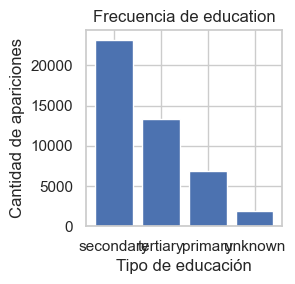

In [322]:
plt.bar(df.education.value_counts().index, df.education.value_counts().values);
plt.title('Frecuencia de education')
plt.xlabel('Tipo de educación')
plt.ylabel('Cantidad de apariciones')

In [323]:
ed_grouped = df.groupby(['education']).sum()
ed_grouped= ed_grouped.reset_index()
ed_grouped= ed_grouped.drop(3)
ed_grouped.sort_values('p_fijo', ascending=False)

,education,age,balance,day,duration,campaign,pdays,previous,p_fijo
1,secondary,927251,26795544,365644,6002027,62664,982686,13173,2450
2,tertiary,526635,23388697,213967,3438555,37583,519060,8805,1996
0,primary,314225,8570258,105652,1753397,19418,247196,3352,591


<AxesSubplot:xlabel='education', ylabel='p_fijo'>

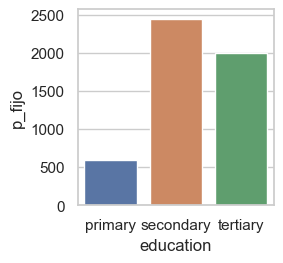

In [324]:
sns.barplot(x=ed_grouped.education,y=ed_grouped.p_fijo)

In [325]:
total = df.p_fijo.sum()
secundario = ed_grouped.p_fijo[1]
prob_sec = secundario / total
prob_sec = prob_sec * 1003

terciario = grouped.p_fijo[2]
prob_ter = terciario / total
prob_ter = prob_ter * 100

total_prob = prob_ter + prob_sec

print('La probabilidad de depósito de una persona perteneciente al nivel académico secundario es del {:.2f}%. \nDel nivel terciario es del {:.2f}%, lo que significa que entre el nivel secundario y el nivel terciario tenemos un {:.2f}% de probabilidades de depósito'.format(prob_sec, prob_ter, total_prob))


La probabilidad de depósito de una persona perteneciente al nivel académico secundario es del 464.62%. 
Del nivel terciario es del 31.16%, lo que significa que entre el nivel secundario y el nivel terciario tenemos un 495.77% de probabilidades de depósito


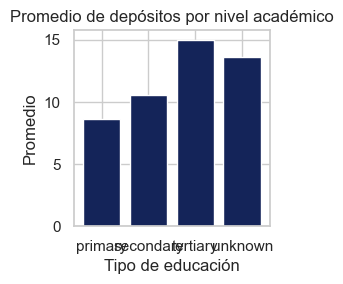

In [326]:
# Calcular el total de depósitos por categoría de education
total_deposits_por_categoria = df.groupby('education')['p_fijo'].sum()

# Calcular el total de registros por categoría de education
total_registros_por_categoria = df['education'].value_counts()

# Calcular el promedio de p_fijo para cada categoría de education
promedio_p_fijo_por_categoria = (total_deposits_por_categoria / total_registros_por_categoria)*100

plt.bar(promedio_p_fijo_por_categoria.index, promedio_p_fijo_por_categoria.values, color='#142459')
plt.title('Promedio de depósitos por nivel académico')
plt.xlabel('Tipo de educación')
plt.ylabel('Promedio')
plt.show()


**Comentarios:**

- Es interesante el análisis ya que el nivel secundario es el que mayor probabilidades tiene de hacer un depósito (46,32%), el nivel terciario 31,16%. Estos dos grupos acumulan un 77,48%.

- Lo problemático al estimar probabilidades reside que el promedio de depósitos para el nivel terciario es del 15% y 10% para el secundario. Entonces a pesar de que exista mayor probabilidad para el nivel secundario el promedio de depósitos es menor.

- Mi hipótesis que declaraba que los grupos con mayor nivel de `education` tienen más probablidad de hacer un depósito, es `falsa`. (31,16% > 46,32% es falso).

***En conclusión:***
- En una primera conclusión creo que usar las dos variables categóricas (`education` y `job`) para determinar la probabilidad de un depósito puede no ser muy precisa. Por lo que probaría utilizando aquella variable con menor cantidad de variables categóricas y ante un escenario de overfitting agregaría la columna de job a las features del modelo. Esto porque al agregar una columna más el modelo va a poder generalizar más, pero esto puede afectar el Recall.

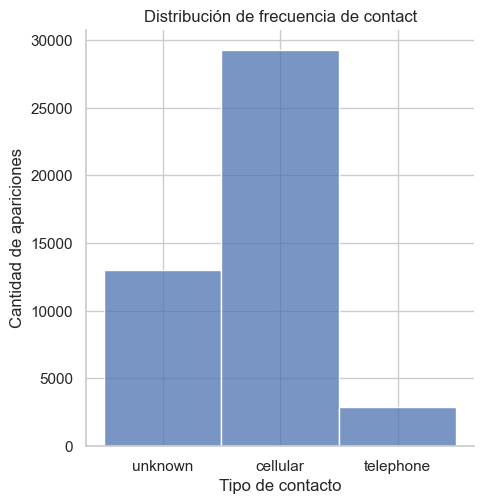

In [327]:
sns.displot(df.contact)
plt.title('Distribución de frecuencia de contact')
plt.xlabel('Tipo de contacto')
plt.ylabel('Cantidad de apariciones')
plt.show()

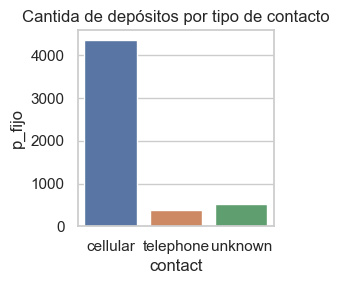

In [328]:
contact_grouped= df.groupby(['contact']).sum()
contact_grouped = contact_grouped.reset_index()
sns.barplot(x='contact', y='p_fijo', data=contact_grouped).set(title='Cantida de depósitos por tipo de contacto')
plt.show()

**Comentarios:**

- Por un lado `cellular` es el medio de contacto con mayor frecuencia. Por el otro lado también es el que mayor cantidad de depósitos obtuvo. 

- Esta variable puede afectar de manera muy positiva al algoritmo de una manera muy negativa, por lo que es a probar e iterar en los modelos. 

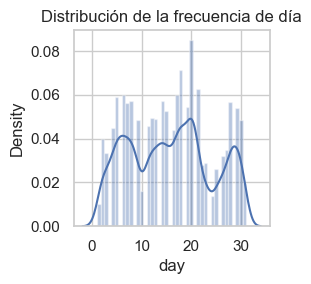

In [329]:
sns.distplot(df.day).set(title='Distribución de la frecuencia de día')
plt.show()

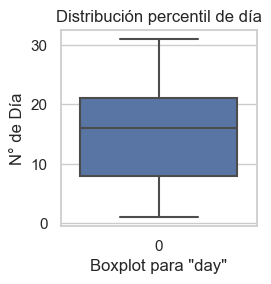

In [330]:
sns.boxplot(df.day).set(title='Distribución percentil de día', xlabel='Boxplot para "day"', ylabel='N° de Día')
plt.show()

In [331]:
from scipy.stats import kurtosis, skew

# Calcular asimetría y curtosis
asimetría = skew(df['day'])
curtosis_valor = kurtosis(df['day'])

# Mostrar los resultados
print("Asimetría:", asimetría)
print("Curtosis:", curtosis_valor)


Asimetría: 0.09307592583897241
Curtosis: -1.0599128678304488


**Comentarios:**

- Asimetría: La asimetría es cercana a cero (0.0931), lo que indica que la distribución tiene una leve tendencia a ser simétrica. Si bien no es completamente simétrica, el sesgo es bastante pequeño, lo que sugiere que la distribución podría ser aproximadamente simétrica o ligeramente sesgada.

- Curtosis: La curtosis es negativa (-1.0599), lo que sugiere que la distribución es menos puntiaguda (aplanada) que una distribución normal. Esto significa que la distribución tiene colas más cortas y es menos pronunciada en el centro en comparación con una distribución normal.

In [332]:
df.day.describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [333]:
day_grouped= df.groupby(['day']).sum()
day_grouped= day_grouped.reset_index()
day_grouped = day_grouped.sort_values('p_fijo', ascending=False)
day_grouped.head()

,day,age,balance,duration,campaign,pdays,previous,p_fijo
29,30,64393,2227384,433671,4709,36991,685,271
11,12,66353,2123615,429800,4104,100141,1316,244
12,13,65004,2029115,435559,3695,108863,1341,241
14,15,69574,2289317,467112,4798,130238,1489,238
3,4,57417,1896001,377613,3211,60265,1198,230


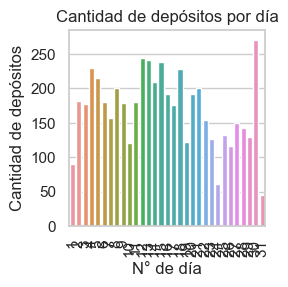

In [334]:
sns.barplot(x=day_grouped.day, y=day_grouped.p_fijo).set(title='Cantidad de depósitos por día', xlabel='N° de día', ylabel='Cantidad de depósitos')
plt.xticks(rotation=90)
plt.show()

In [335]:
# Calcula la correlación de punto biserial
correlation, p_value = pointbiserialr(df['day'], df['p_fijo'])

# Imprime los resultados
print(f"Correlación de punto biserial: {correlation}")
print(f"Valor p: {p_value}")


Correlación de punto biserial: -0.02834777672092991
Valor p: 1.6538801608201822e-09


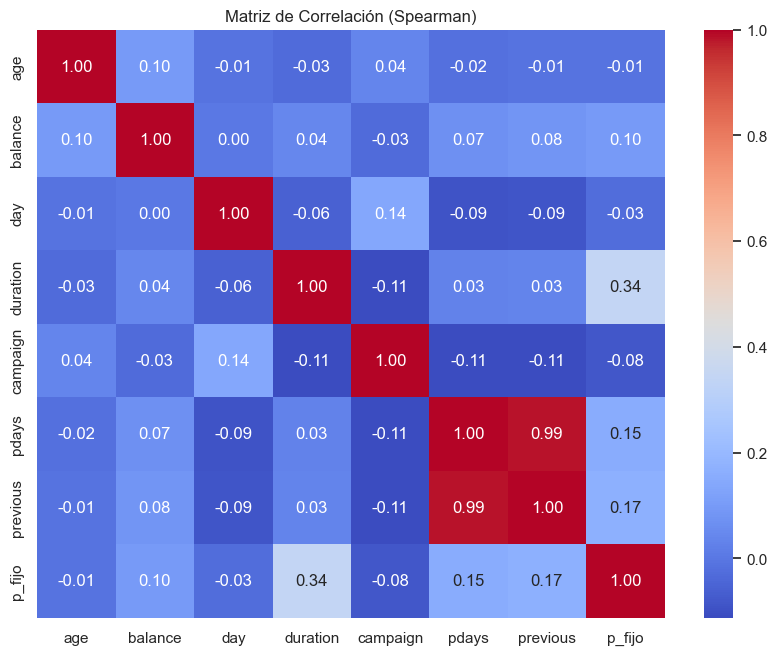

In [336]:
correlation_matrix = df.corr(method='spearman')

plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Spearman)")
plt.show()


**Comentarios:**

- El valor de la correlación (entre day y p_fijo) es aproximadamente ***-0.0283***, lo que indica una correlación muy débil y cercana a cero.

- El valor p asociado a la correlación es extremadamente pequeño, ***1.6538801608201822e-09***, lo que significa que es muy improbable que la correlación observada se deba al azar. Dado que el valor p es tan pequeño, podemos rechazar la hipótesis nula y concluir que existe una correlación significativa entre las variables.

Sin embargo, es importante tener en cuenta que aunque la correlación es estadísticamente significativa debido al valor p pequeño, la magnitud de la correlación es muy baja, lo que sugiere una relación muy débil entre las variables `day` y `p_fijo`. 

***En resumen***, 
- Aunque hay una correlación significativa, esta es prácticamente insignificante desde el punto de vista práctico debido a su magnitud cercana a cero.

- Podría ser una variable útil a usar si necesitamos que el modelo de predicción generalice. No la descarto, pero de primeras no le veo mucha utilidad.

In [337]:
df2 = df.copy()

month_to_number = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df2['month'] = df2['month'].replace(month_to_number)

df2['year'] = 2023

df2['date'] = df2.apply(lambda row: datetime(row['year'], row['month'], 1), axis=1)

df2 = df2.drop(columns=['year', 'month'])

month_grouped = df2.groupby(['date']).sum()

month_grouped = month_grouped.reset_index()

month_grouped = month_grouped.sort_values('date')

month_grouped['date'] = month_grouped['date'].dt.strftime('%B')

month_grouped.head(3)


,date,age,balance,day,duration,campaign,pdays,previous,p_fijo
0,January,56812,1328337,38522,376313,2346,95261,1663,142
1,February,108305,3494293,16834,657742,6310,181994,3133,441
2,March,20483,976051,6742,116579,1052,33976,567,248


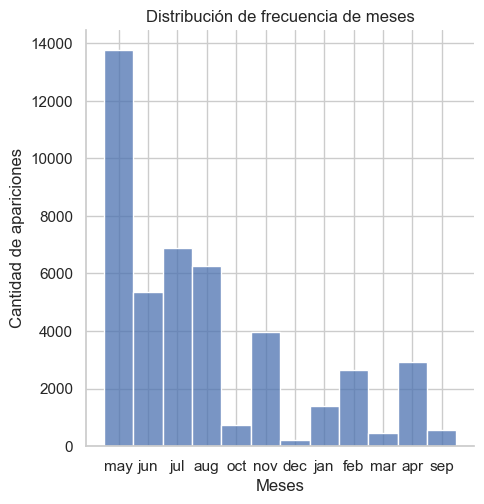

In [338]:
sns.displot(df.month)
plt.title('Distribución de frecuencia de meses')
plt.xlabel('Meses')
plt.ylabel('Cantidad de apariciones')
plt.show()

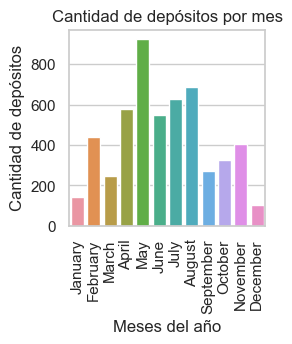

In [339]:
sns.barplot(x=month_grouped.date,y=month_grouped.p_fijo).set(title='Cantidad de depósitos por mes', xlabel='Meses del año', ylabel='Cantidad de depósitos')
plt.xticks(rotation=90);

***Comentarios:***

El hecho de que en mayo se registre el pico de la mayor cantidad de depósitos a plazo fijo en Portugal puede tener diferentes interpretaciones y significados. A continuación, algunas posibles explicaciones:

1. Comportamiento estacional: El pico en mayo podría estar relacionado con un patrón estacional en el comportamiento de los depósitos a plazo fijo. Puede ser que los individuos o las empresas en Portugal tiendan a depositar más dinero en ese período específico del año debido a factores como bonificaciones o pagos de bonos, vencimientos de contratos o estacionalidad de ciertas actividades económicas.

2. Factores económicos: El aumento en los depósitos a plazo fijo en mayo podría estar influenciado por factores económicos o financieros específicos. Por ejemplo, puede ser que en ese momento haya habido un aumento en la confianza de los inversores en la economía portuguesa, lo que llevó a más personas a depositar su dinero en instituciones financieras. También podría estar relacionado con cambios en las tasas de interés u otras políticas monetarias que hicieron que los depósitos a plazo fijo fueran más atractivos.

3. Eventos extraordinarios: Es posible que en mayo de ese año en particular haya ocurrido un evento extraordinario o una circunstancia especial que impulsó un aumento en los depósitos a plazo fijo. Por ejemplo, podría haberse producido una crisis financiera o una situación de incertidumbre económica que llevó a las personas a buscar opciones de inversión más seguras y estables.

***Quisiera comparar estos datos con los de una economía totalmente diferente como es el de Argentina:***

> Comparándo los depósitos de portugal con los depósitos en Argentina 

In [340]:
url = "https://api.estadisticasbcra.com/plazo_fijo" #Datos sobre depósitos de plazos fijos en Argentina desde 1996 hasta la actualidad
headers = {os.getenv('header1') : os.getenv('header2')}
r = requests.get(url, headers=headers)

In [341]:
r.text;
text = r.text
json_bcra= json.loads(text)

df_bcra=pd.DataFrame(json_bcra)
df_bcra.info() #Para ver qué tipo de datos tenemos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6789 entries, 0 to 6788
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   d       6789 non-null   object
 1   v       6789 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 106.2+ KB


In [342]:
df_bcra.rename(columns={'d' : 'fecha','v': 'p_fijo'}, inplace = True) #Transformamos nombres de columnas
df_bcra['fecha'] =  pd.to_datetime(df_bcra['fecha'], format='%Y-%m-%d') #Transformamos valores object a datetime
df_bcra.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6789 entries, 0 to 6788
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   6789 non-null   datetime64[ns]
 1   p_fijo  6789 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 106.2 KB


In [343]:
df_bcra.head(3)

,fecha,p_fijo
0,1996-01-02,26134
1,1996-01-03,26014
2,1996-01-04,26251


In [344]:
df_bcra['year'] = df_bcra['fecha'].dt.to_period('Y') #Creamos una columna de año

In [345]:
grouped_bcra= df_bcra.groupby('year').first()
grouped_bcra.reset_index(inplace= True)
grouped_bcra.head(3) #Agrupamos por año

,year,fecha,p_fijo
0,1996,1996-01-02,26134
1,1997,1997-01-02,31063
2,1998,1998-01-02,41465


In [346]:
df_bcra.year= df_bcra.year.astype(str)
grouped_bcra.p_fijo = grouped_bcra.p_fijo.astype(int)
grouped_bcra.year= grouped_bcra.year.astype(str)

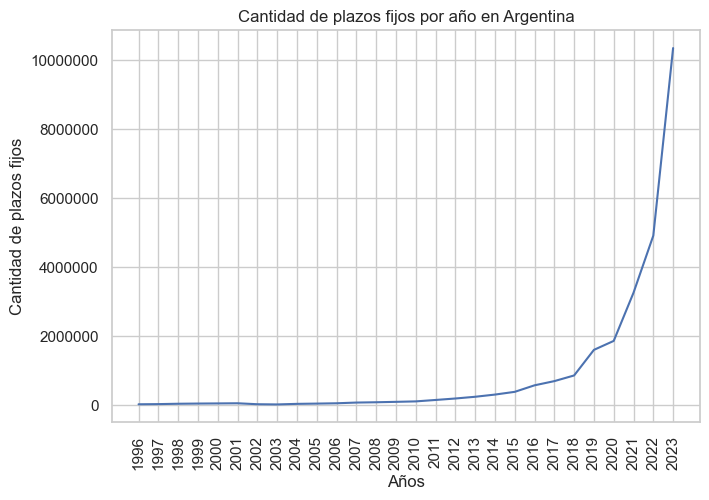

In [347]:
fig, ax = plt.subplots(figsize=(6,4)) # Visualizamos los datos para ver que composición tienen
plt.style.use('_mpl-gallery')

plt.plot(grouped_bcra.year,grouped_bcra.p_fijo)

plt.title('Cantidad de plazos fijos por año en Argentina')

plt.ylabel('Cantidad de plazos fijos')

plt.xlabel('Años')

plt.ticklabel_format(axis="y", style='plain')

plt.xticks(rotation=90);

***Comentarios:***
- Vemos que a lo largo de los años los depósitos en argentino fueron mayormente en aumento.

In [348]:
df_bcra["month"] = pd.DatetimeIndex(df_bcra["fecha"]).strftime("%b").str.lower() #Procesemos la información por meses para comparar
df_bcra

,fecha,p_fijo,year,month
0,1996-01-02,26134,1996,jan
1,1996-01-03,26014,1996,jan
2,1996-01-04,26251,1996,jan
3,1996-01-05,26432,1996,jan
4,1996-01-08,26472,1996,jan
...,...,...,...,...
6784,2023-07-07,15730887,2023,jul
6785,2023-07-10,15718294,2023,jul
6786,2023-07-11,15887265,2023,jul
6787,2023-07-12,15979843,2023,jul


In [349]:
month_to_number = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df_bcra['month'] = df_bcra['month'].replace(month_to_number)

df_bcra['year'] = 2023

df_bcra['date'] = df_bcra.apply(lambda row: datetime(row['year'], row['month'], 1), axis=1)

df_bcra = df_bcra.drop(columns=['year', 'month'])

bcra_month_grouped = df_bcra.groupby(['date']).sum()

bcra_month_grouped = bcra_month_grouped.reset_index()

bcra_month_grouped = bcra_month_grouped.sort_values('date')

bcra_month_grouped['date'] = bcra_month_grouped['date'].dt.strftime('%B')

bcra_month_grouped #Agrupado por meses y por cantidad de plazos fijos por mes


,date,p_fijo
0,January,599972070
1,February,538582900
2,March,650867900
3,April,608561788
4,May,685102357
5,June,726225813
6,July,605388295
7,August,494896530
8,September,513683086
9,October,500998680


> Normalizamos para comparar las dos muestras

In [350]:
bcra_month_grouped['valor_normalizado'] = ((bcra_month_grouped.p_fijo - bcra_month_grouped.p_fijo.min())/ (bcra_month_grouped.p_fijo.max()-bcra_month_grouped.p_fijo.min())) 
bcra_month_grouped

,date,p_fijo,valor_normalizado
0,January,599972070,0.454225
1,February,538582900,0.188849
2,March,650867900,0.674240
3,April,608561788,0.491357
4,May,685102357,0.822230
5,June,726225813,1.000000
6,July,605388295,0.477638
7,August,494896530,0.000000
8,September,513683086,0.081211
9,October,500998680,0.026379


In [351]:
month_grouped['valor_normalizado'] = ((month_grouped.p_fijo - month_grouped.p_fijo.min())/ (month_grouped.p_fijo.max()-month_grouped.p_fijo.min()))
month_grouped

,date,age,balance,day,duration,campaign,pdays,previous,p_fijo,valor_normalizado
0,January,56812,1328337,38522,376313,2346,95261,1663,142,0.050909
1,February,108305,3494293,16834,657742,6310,181994,3133,441,0.413333
2,March,20483,976051,6742,116579,1052,33976,567,248,0.179394
3,April,116608,4522760,50774,874026,5733,279132,3086,577,0.578182
4,May,535375,14247708,213251,3591856,33693,717998,8053,925,1.000000
5,June,226662,8589515,60885,1298332,16746,48894,1057,546,0.540606
6,July,282756,6205676,128897,1847690,24301,55383,896,627,0.638788
7,August,267962,8918853,102655,1451816,24534,83266,1739,688,0.712727
8,September,25452,1128061,6872,169214,1022,66248,1097,269,0.204848
9,October,33868,1706530,13120,212767,1134,62256,1140,323,0.270303


In [352]:
# Crear trazas de línea
trace1 = go.Scatter(x=bcra_month_grouped['date'], y=bcra_month_grouped['valor_normalizado'], name='Argentina', mode='lines')
trace2 = go.Scatter(x=month_grouped['date'], y=month_grouped['valor_normalizado'], name='Portugal', mode='lines')

# Crear una lista de datos
data = [trace1, trace2]

# Crear un objeto Layout
layout = go.Layout(title='Comparación entre la cantidad de plazos fijos en argentina y en el banco de Portugal', xaxis_title='Meses', yaxis_title='Cantidad de plazos fijos') 

# Crear la figura
fig = go.Figure(data=data, layout=layout)

# Mostrar la figura
fig.show()


***Comentarios:***
- A primera vista pareciera que Portugal tiene aumentos y disminuciones similares a la argentina pero un mes adelantado. Es decir, en Febrero Argentina decrece y en Marzo (el siguiente mes) decrece Portugal. Otro ejemplo sería que en Agosto decrece Argentina y Portugal lo hace en Septiembre.

- Ambos países registran cimas en Mayo (Portugal) y Junio (Argentina).

- La tendencia para ambos países está en mayor cantidad de depósitos para los meses entre `Abril` y `Agosto`.

***Conclusiones:***
- Al comparar la información de este dataframe con el de un país del hemisferio contrario, como es Argentina, podemos intentar ver patrones o descartarlos. Sin duda en ambos países los meses de `Mayo` y `Junio` son meses con alta probabilidad de generar depósitos (`Mayo` para Portugal y `Junio` para la Argentina)

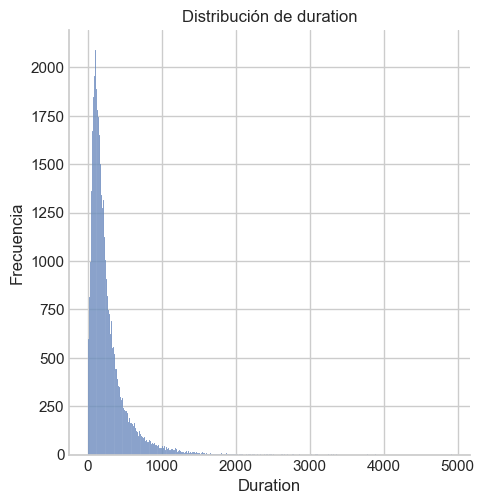

In [353]:
sns.displot(df.duration).set(title='Distribución de duration', xlabel='Duration', ylabel='Frecuencia')
plt.show()

> Procesamos esta columna para mejor visualización

In [354]:
duration_group= df.groupby(['duration']).sum()
duration_group = duration_group.reset_index()
duration_group= duration_group.sort_values('p_fijo',ascending=False)
duration_group

,duration,age,balance,day,campaign,pdays,previous,p_fijo
261,261,3123,104243,1026,163,4639,57,19
226,226,4740,191356,1751,256,4114,56,17
187,187,4800,225757,1812,316,4658,94,16
229,229,3621,140712,1267,192,4157,55,16
232,232,3528,138831,1270,172,5918,60,16
...,...,...,...,...,...,...,...,...
1155,1170,37,447,9,1,-1,0,0
1153,1168,39,1072,27,2,-1,0,0
1152,1167,71,614,18,2,-2,0,0
1151,1166,145,26252,71,6,1036,16,0


In [355]:
duration_group.duration.min() - duration_group.duration.max() #Tenemos un rango muy alto, vamos a tener que crear grupos para visualizar la data

-4918

In [356]:
# Definimos los límites de los grupos, elegimos 1000 según la distribución para los grupos.
bins = [i for i in range(0, duration_group['duration'].max() + 500, 500)]

# Creamos las etiquetas para cada grupo: 
labels = [f'Grupo {i+1}' for i in range(len(bins)-1)]

# Creamos una nueva columna con las etiquetas 
duration_group['group'] = pd.cut(duration_group['duration'], bins=bins, labels=labels, right=False)

#Veamos
duration_group


,duration,age,balance,day,campaign,pdays,previous,p_fijo,group
261,261,3123,104243,1026,163,4639,57,19,Grupo 1
226,226,4740,191356,1751,256,4114,56,17,Grupo 1
187,187,4800,225757,1812,316,4658,94,16,Grupo 1
229,229,3621,140712,1267,192,4157,55,16,Grupo 1
232,232,3528,138831,1270,172,5918,60,16,Grupo 1
...,...,...,...,...,...,...,...,...,...
1155,1170,37,447,9,1,-1,0,0,Grupo 3
1153,1168,39,1072,27,2,-1,0,0,Grupo 3
1152,1167,71,614,18,2,-2,0,0,Grupo 3
1151,1166,145,26252,71,6,1036,16,0,Grupo 3


> Graficamos los grupos para ver la distribución de los grupos con respecto la cantidad de plazos fijos

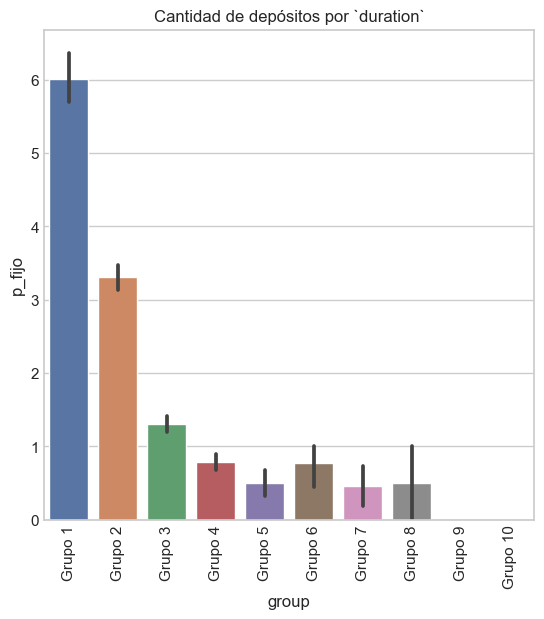

In [357]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x='group',y='p_fijo',data=duration_group).set(title='Cantidad de depósitos por `duration`')
plt.xticks(rotation=90)
plt.show()

In [358]:
duration_group.groupby(['group']).sum()

,duration,age,balance,day,campaign,pdays,previous,p_fijo
group,,,,,,,,
Grupo 1,124750,1630154,53407925,629757,111246,1615156,23149,3007
Grupo 2,373021,176984,6530649,68546,10737,166370,2574,1646
Grupo 3,463658,34169,1262400,12831,2421,28901,396,497
Grupo 4,237329,6855,305845,2583,418,5992,108,109
Grupo 5,75099,1611,56322,509,77,988,10,17
Grupo 6,24301,375,14323,153,29,-9,0,7
Grupo 7,35205,456,3369,199,23,-11,0,5
Grupo 8,7666,104,2276,36,4,-2,0,1
Grupo 9,0,0,0,0,0,0,0,0


In [359]:
# Calculamos la correlación de punto biserial
correlation, p_value = pointbiserialr(df['duration'], df['p_fijo'])

print(f"Correlación de punto biserial: {round(correlation,2)}")
print(f"Valor p: {p_value}")


Correlación de punto biserial: 0.39
Valor p: 0.0


**Comentarios:**

1. La correlación de punto biserial es `0.39`, lo que sugiere que hay una `correlación positiva moderada` entre la variable `p_fijo` y `duration`.

2. El valor p es 0.0, lo que indica que la correlación observada es altamente significativa, es decir, es poco probable que haya ocurrido por azar.

***Por lo que, en resumen:***
- `Duration` tiene una relación fuerte con `p_fijo` y además sabemos que mientras menos duration (0-500) más probabilidad de que se realice un depósito (`57%`). Si bien de una correlación no podemos crear una causalidad, tiene sentido que a mientras menos se espere entre contacto y contacto menos posibilidades de que el cliente se "enfríe" y se decida por no depositar.

- Por eso, es muy importante que los equipos de telemarketing se tomen menos de 500 días de duración entre contacto y contacto para maximizar sus resultados.

<AxesSubplot:xlabel='age', ylabel='Density'>

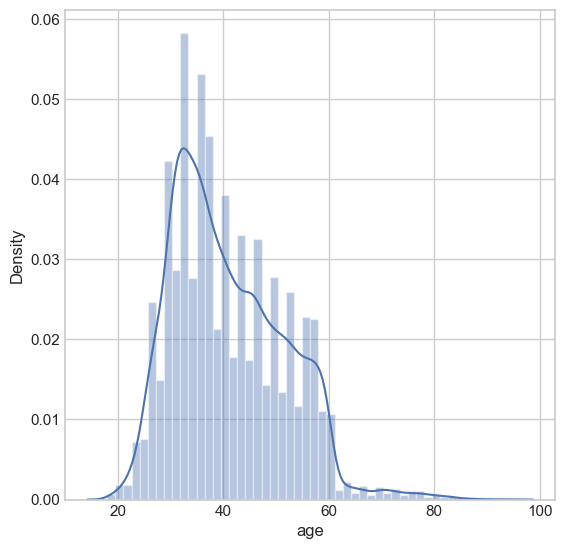

In [360]:
f, ax = plt.subplots(figsize=(5, 5))
sns.distplot(df.age)

In [361]:
age_grouped = df.groupby(['age', 'job', 'marital', 'education']).sum()
age_grouped = age_grouped.reset_index() 
age_grouped

,age,job,marital,education,balance,day,duration,campaign,pdays,previous,p_fijo
0,18,student,single,primary,3160,35,599,5,91,1,2
1,18,student,single,secondary,161,28,441,4,81,4,0
2,18,student,single,unknown,1148,79,1530,12,177,1,5
3,19,student,single,primary,2599,131,1394,17,477,10,3
4,19,student,single,secondary,8495,223,3059,35,870,9,5
...,...,...,...,...,...,...,...,...,...,...,...
3632,92,retired,married,unknown,1550,48,477,7,95,3,2
3633,93,retired,married,unknown,1550,26,1336,4,190,16,2
3634,94,retired,divorced,secondary,1234,3,212,1,-1,0,0
3635,95,retired,divorced,primary,2282,21,207,17,-1,0,1


In [362]:
bins = [18, 24, 45, 66, 87, float('inf')]

labels = ['18-23', '24-44', '45-65', '66-86', '87+']

# Creamos una nueva columna 'grupo_edad' con las etiquetas de los grupos
age_grouped['grupo_edad'] = pd.cut(age_grouped['age'], bins=bins, labels=labels, right=False)

age_grouped

,age,job,marital,education,balance,day,duration,campaign,pdays,previous,p_fijo,grupo_edad
0,18,student,single,primary,3160,35,599,5,91,1,2,18-23
1,18,student,single,secondary,161,28,441,4,81,4,0,18-23
2,18,student,single,unknown,1148,79,1530,12,177,1,5,18-23
3,19,student,single,primary,2599,131,1394,17,477,10,3,18-23
4,19,student,single,secondary,8495,223,3059,35,870,9,5,18-23
...,...,...,...,...,...,...,...,...,...,...,...,...
3632,92,retired,married,unknown,1550,48,477,7,95,3,2,87+
3633,93,retired,married,unknown,1550,26,1336,4,190,16,2,87+
3634,94,retired,divorced,secondary,1234,3,212,1,-1,0,0,87+
3635,95,retired,divorced,primary,2282,21,207,17,-1,0,1,87+


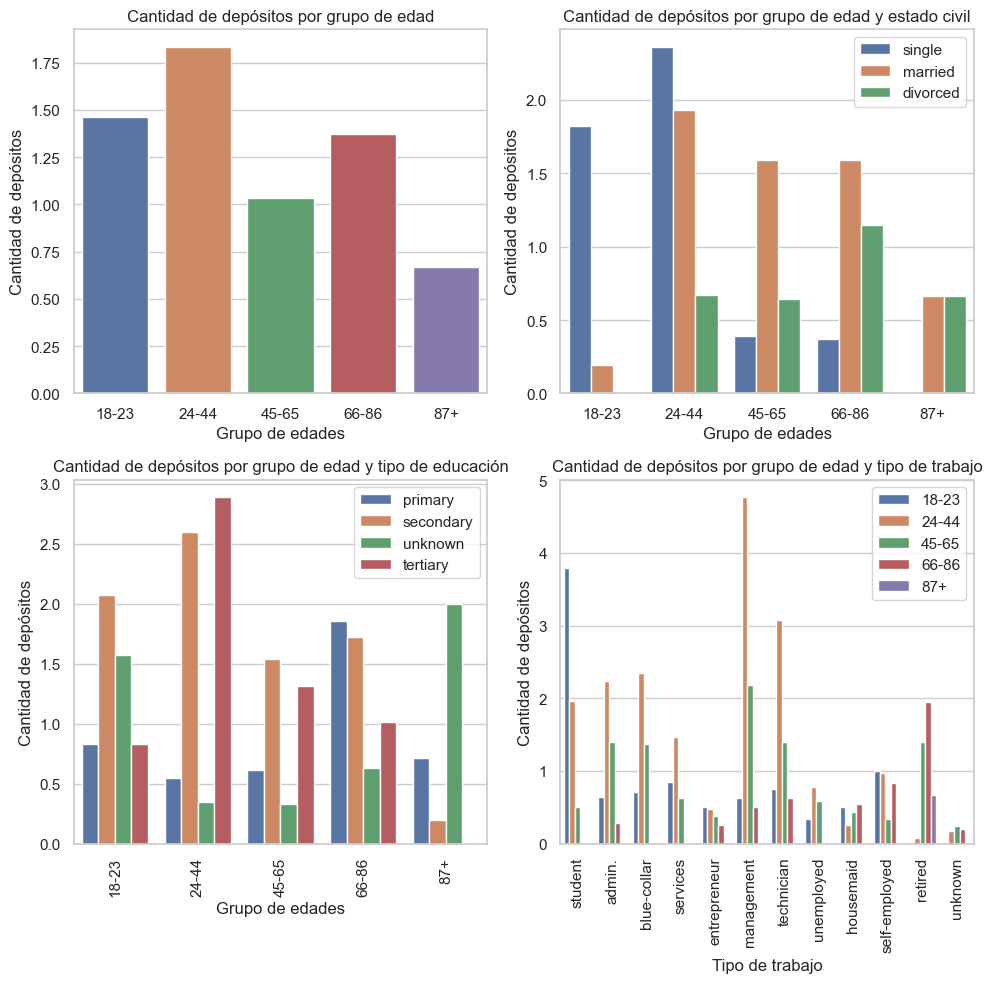

In [363]:
sns.set(style="whitegrid")

# Crear el subplot con 2 filas y 2 columnas
f, axes = plt.subplots(2, 2, figsize=(10, 10))

# Gráfico 1: Cantidad de depósitos por grupo de edad
sns.barplot(x='grupo_edad', y='p_fijo', data=age_grouped, ax=axes[0, 0], ci=None).set(title='Cantidad de depósitos por grupo de edad', xlabel='Grupo de edades', ylabel='Cantidad de depósitos')

# Gráfico 2: Cantidad de depósitos por grupo de edad y estado civil
sns.barplot(x='grupo_edad', y='p_fijo', hue='marital', data=age_grouped, ax=axes[0, 1], ci=None).set(title='Cantidad de depósitos por grupo de edad y estado civil', xlabel='Grupo de edades', ylabel='Cantidad de depósitos')
axes[0, 1].legend(loc='upper right')

# Gráfico 3: Cantidad de depósitos por grupo de edad y tipo de educación
sns.barplot(x='grupo_edad', y='p_fijo', hue='education', data=age_grouped, ax=axes[1, 0], ci=None).set(title='Cantidad de depósitos por grupo de edad y tipo de educación', xlabel='Grupo de edades', ylabel='Cantidad de depósitos')
axes[1, 0].legend(loc='upper right')
axes[1, 0].tick_params(axis='x', rotation=90)

# Gráfico 4: Cantidad de depósitos por grupo de edad y tipo de trabajo
sns.barplot(x='job', y='p_fijo', hue='grupo_edad', data=age_grouped, ax=axes[1, 1], ci=None).set(title='Cantidad de depósitos por grupo de edad y tipo de trabajo', xlabel='Tipo de trabajo', ylabel='Cantidad de depósitos')
axes[1, 1].legend(loc='upper right')
axes[1, 1].tick_params(axis='x', rotation=90)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

plt.show()


***Comentarios:***

- Mi hipótesis sobre que las personas entre las edades de 18-44 tienen una probabilidad menor que el grupo de 45-65 de hacer un depósito, es `falsa`, por lo que se rechaza la hipótesis y se toma la alternativa. 

- Es decir, que el grupo de 18-44 tiene más probabilidades de hacer un depósito. Siendo el grupo de 24-44 el que mayor probabilidad tiene. Esto también se debe a que la mayor cantidad de clientes del banco se encuentran en estas edades.

***Resumen:***
- Parece cobrar más sentido los motivos de porqué variaba tanto la cantidad de depósitos al comparar tipo de trabajo y nivel educativo. La edad tenía algo que ver, ya que vemos que de management son las personas de entre 24-44 que mayor cantidad de depositantes tiene y vemos que también podemos atribuírselos a personas con nivel terciario. Un grupo bastante único 24-44 - management - terciario. 

- También nos permite ver fácilmente que hay mayor distribución de personas con secundario solamente, entre los grupos de edad 18-65.

- Nos queda más claro el mejor  público objetivo: `Personas entre 24-44 años, solteras, con nivel terciario finalizado, que realicen trabajos de management, technician o blue-collar. Que no tengan ni loan, ni housing. Sería lo mejor contactarlas durante Mayo o Agosto y que entre contacto y contacto no pasen más de 500 días de duración.`


In [364]:
campaing_grouped = df.groupby(['campaign']).sum()
campaing_grouped = campaing_grouped.sort_values('p_fijo',ascending=False)
campaing_grouped = campaing_grouped.reset_index()

pdays_grouped = df.groupby(['pdays']).sum()
pdays_grouped = pdays_grouped.sort_values('p_fijo',ascending=False)
pdays_grouped = pdays_grouped.reset_index()

previous_grouped = df.groupby(['previous']).sum()
previous_grouped = previous_grouped.sort_values('p_fijo',ascending=False)
previous_grouped = previous_grouped.reset_index()

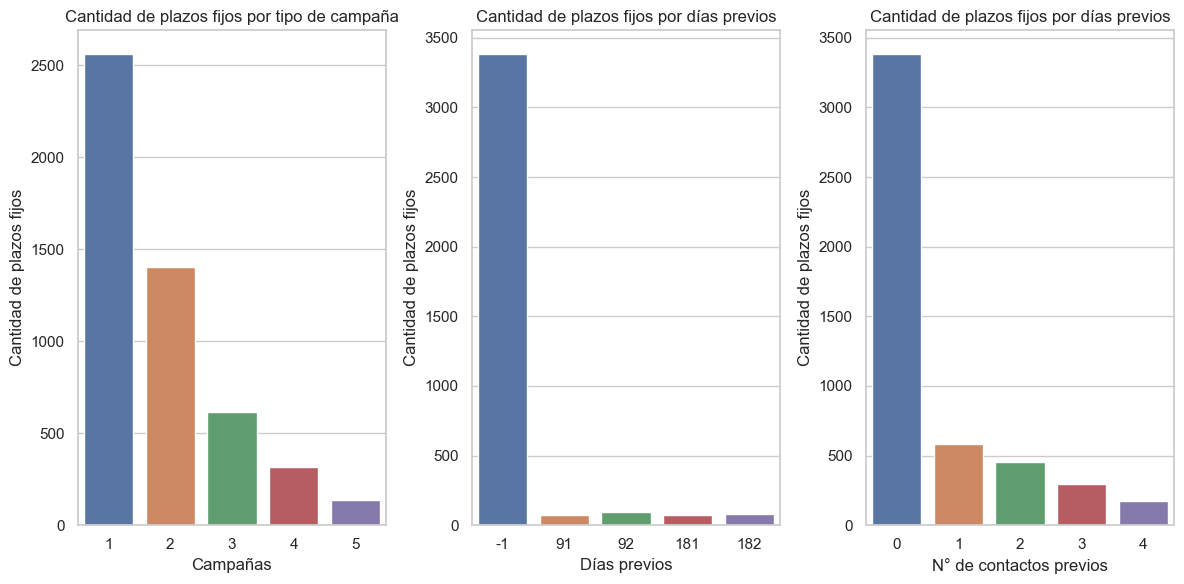

In [365]:
f, axes = plt.subplots(1, 3, figsize=(12, 6))  # 1 fila, 2 columnas para dos gráficos de barras

# Gráfico 1: Cantidad de plazos fijos por tipo de campaña
sns.barplot(data=campaing_grouped[0:5], x='campaign', y='p_fijo', ax=axes[0], ci=None)
axes[0].set_title('Cantidad de plazos fijos por tipo de campaña')
axes[0].set_ylabel('Cantidad de plazos fijos')
axes[0].set_xlabel('Campañas')

# Gráfico 2: Cantidad de plazos fijos por tipo de campaña
sns.barplot(data=pdays_grouped[0:5], x='pdays', y='p_fijo', ax=axes[1], ci=None)
axes[1].set_title('Cantidad de plazos fijos por días previos')
axes[1].set_ylabel('Cantidad de plazos fijos')
axes[1].set_xlabel('Días previos')

# Gráfico 3: Cantidad de plazos fijos por contacto previo
sns.barplot(data=previous_grouped[0:5], x='previous', y='p_fijo', ax=axes[2], ci=None)
axes[2].set_title('Cantidad de plazos fijos por días previos')
axes[2].set_ylabel('Cantidad de plazos fijos')
axes[2].set_xlabel('N° de contactos previos')

plt.tight_layout()  # Ajustar el espaciado entre los gráficos
plt.show()


***Comentarios:***
- En cuanto a `Campañas`: Vemos que la mayor cantidad de depósitos está en las campañas cuyos contactos realizados durante la campaña para cada cliente fue 1 vez o hasta 2 veces.

- En cuanto `p_days`: Vemos que la mayor cantidad de plazos fijos se dieron por personas que no habían sido contactadas previamente. 

- En cuanto `previous`: Vemos también, que hay mayor cantidad de plazos fijos por persoans que no habían sido contactadas previamente.  

***En resumen:***
- Las campañas efectivas son aquellas en las que el cliente es contactado por primera vez y demuestra interés de hacer un depósito entre el primer y el segundo contacto. Luego es muy díficil que el cliente haga el depósito si lo seguimos contactando. Quizá esto pueda servirle al equipo de marketing para entender que se debe hacer el mejor esfuerzo por persuadir al cliente en el primer contacto. De no ser posible existe una segunda posibilidad. Pero a partir de allí será muy díficil obtener una respuesta positiva.

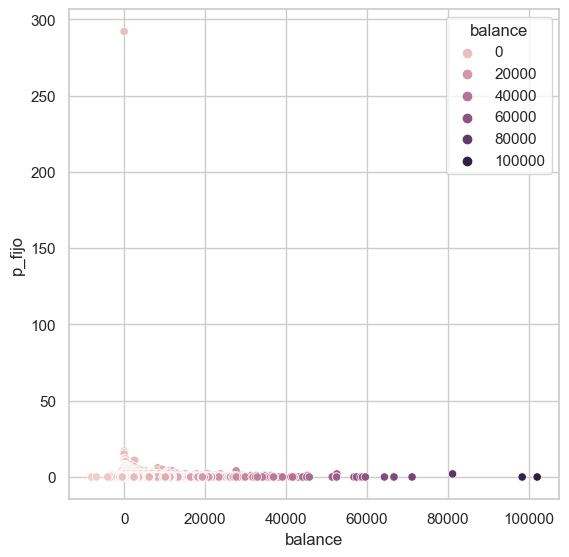

In [366]:
balance_grouped = df.groupby(['balance']).sum()
balance_grouped = balance_grouped.sort_values('p_fijo',ascending=False)
balance_grouped = balance_grouped.reset_index()

plt.subplots(figsize=(5,5))
sns.scatterplot(x='balance', y='p_fijo', hue='balance',data=balance_grouped)
plt.show()

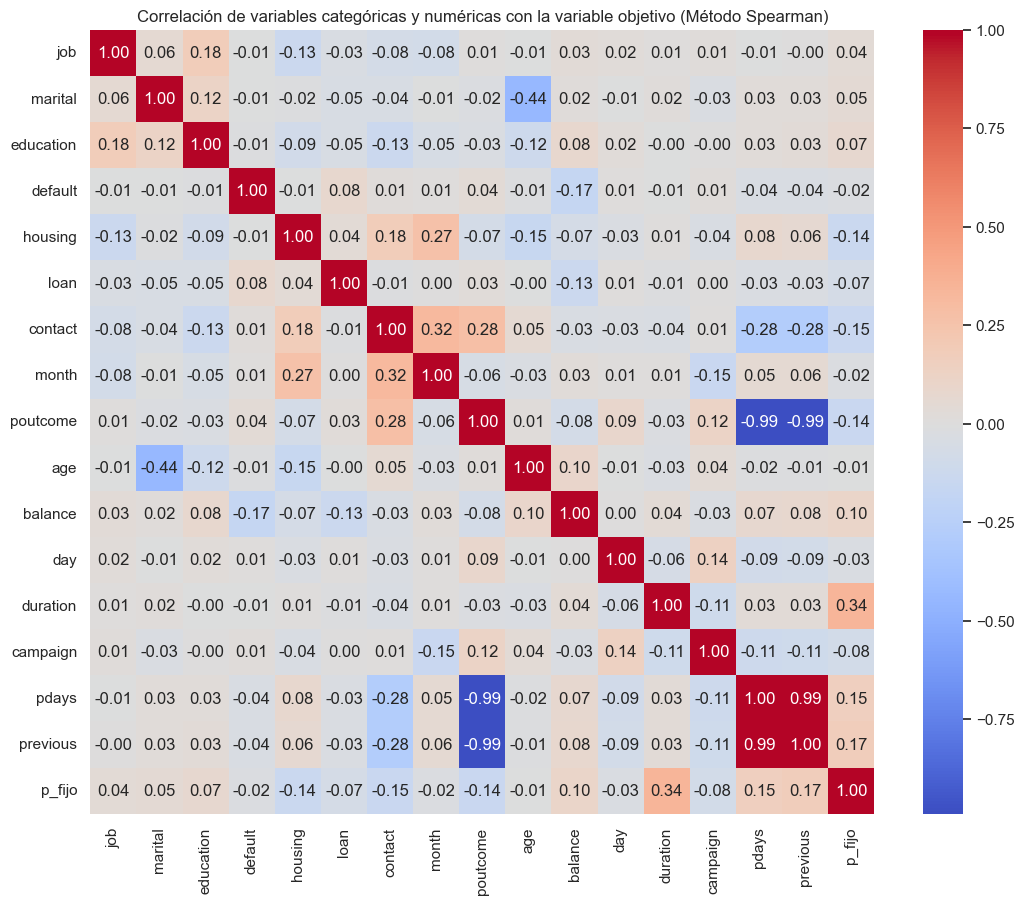

In [367]:
# Convierte las variables categóricas en variables numéricas usando el coeficiente de correlación de punto biserial
categorical_columns = df.select_dtypes(include='object').columns
correlation_df = pd.DataFrame()

for column in categorical_columns:
    correlation_df[column] = df[column].astype('category').cat.codes

# Agregamos las columnas numéricas al DataFrame
numeric_columns = df.select_dtypes(include='number').columns
correlation_df[numeric_columns] = df[numeric_columns]

# Calculamos la matriz de correlación de Spearman
correlation_matrix = correlation_df.corr(method='spearman')

# Visualizamos
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlación de variables categóricas y numéricas con la variable objetivo (Método Spearman)')
plt.show()


### 4.4 Modelado para Predicción de depósitos

- El análisis exploratorio de todas las variables nos dió la idea de qué variables utilizar para el modelo dado las probabilidades de cada una. Además al entender mejor el tipo de dato podemos decidir que hacer con cada variable para mejorar la predicción.

- Lo que vamos a buscar es una buen 'recall', lo que quiere decir que vamos a buscar tener un porcentaje del 95% o más de precisión en casos verdaderos positivos. 

- Los modelos que vamos a utilizar son 
    1. Regresión Logística: Es un modelo de clasificación lineal que se utiliza para predecir una variable categórica binaria. Es un modelo simple y rápido de implementar.

    2. Árboles de Decisión: Los árboles de decisión dividen el conjunto de datos en ramas basadas en características para llegar a una decisión. Son fáciles de interpretar y pueden manejar tanto características numéricas como categóricas.

    3. Random Forest: Es un conjunto de árboles de decisión que combina las predicciones de varios árboles para obtener una predicción más precisa y reducir el sobreajuste.

    4. Gradient Boosting: Al igual que Random Forest, Gradient Boosting es un conjunto de árboles de decisión, pero en lugar de entrenar los árboles de forma independiente, se construyen secuencialmente para corregir los errores de los árboles anteriores. XGBoost y LightGBM son librerías populares para implementar Gradient Boosting.

    5. Support Vector Machines (SVM): SVM es un modelo que encuentra un hiperplano que mejor separa las clases en el espacio de características. Puede ser efectivo en problemas de clasificación binaria.
    
    6. Redes Neuronales: Utilizaremos la biblioteca Keras, que es parte de TensorFlow 2. Keras es una API de alto nivel que facilita la construcción y entrenamiento de redes neuronales de forma rápida y sencilla.

In [368]:
df_train = df.copy()
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,p_fijo
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [369]:
age_bins = [18, 25, 45, 66, 87, float('inf')]  

age_labels = [1, 2, 3, 4, 5]

df_train['age_group'] = pd.cut(df_train['age'], bins=age_bins, labels=age_labels, right=False)

In [370]:
def assign_label(row):
    if row['loan'] == 0 and row['housing'] == 0:
        return 1
    elif row['loan'] == 1 and row['housing'] == 0:
        return 2
    elif row['loan'] == 0 and row['housing'] == 1:
        return 3
    elif row['loan'] == 1 and row['housing'] == 1:
        return 4
    else:
        return 0  # Etiqueta predeterminada si ninguna condición se cumple

# Convertir las columnas 'loan' y 'housing' a enteros
df_train['loan'] = df_train['loan'].astype(int)
df_train['housing'] = df_train['housing'].astype(int)

# Aplicar la función para asignar etiquetas utilizando apply
df_train['debt_status'] = df_train.apply(assign_label, axis=1)

df_train.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,p_fijo,age_group,debt_status
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,3,3
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,2,3
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,2,4


In [371]:
le = LabelEncoder() #Para poder tratar las variables categóricas
sc = StandardScaler() #Para estandarizar variables continuas 

In [372]:
df_train['education']= le.fit_transform(df_train['education'])
df_train['job']= le.fit_transform(df_train['job'])
df_train['marital']= le.fit_transform(df_train['marital'])
df_train['poutcome'] = le.fit_transform(df_train['poutcome'])
df_train['contact'] = le.fit_transform(df_train['contact'])
df_train['month'] = le.fit_transform(df_train['month'])

In [373]:
df_train['balance'] = sc.fit_transform(df_train['balance'].values.reshape(-1, 1))
df_train['duration'] = sc.fit_transform(df_train['duration'].values.reshape(-1, 1))

In [374]:
total = df.p_fijo.value_counts()[1] + df.p_fijo.value_counts()[0]
depositos = df.p_fijo.value_counts()[1]
no_depositos = df.p_fijo.value_counts()[0]
print('El porcentaje total de depósitos corresponde a {:.2%} y el porcentaje total de no depósitos corresponde al {:.2%}'.format(depositos/total, no_depositos/total))

El porcentaje total de depósitos corresponde a 11.70% y el porcentaje total de no depósitos corresponde al 88.30%


Estamos ante una situación de desbalance de la variable objetivo.

> Cargamos las variables y las dividimos en entrenamiento y en test 

In [375]:
features= ['age_group', 'job', 'marital', 'education', 'balance', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'debt_status']

X= df_train[features] #seleccionamos las variables que ayudarán a predecir y

y= df_train['p_fijo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123) 

> Usamos Random Over Sampler para aumentar la minoría de variables en nuestra variable objetivo.

In [376]:
features= ['age_group', 'job', 'marital', 'education', 'balance', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'debt_status']

X= df_train[features] #seleccionamos las variables que ayudarán a predecir y

y= df_train['p_fijo']

ro =  RandomOverSampler(sampling_strategy=0.15, random_state=123)

X_train_res, y_train_res = ro.fit_resample(X, y)

print ("Distribution before resampling {}".format(Counter(y)))

print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 39922, 1: 5289})
Distribution labels after resampling Counter({0: 39922, 1: 5988})


> Creamos una función para comenzar el entrenamiento y visualización de rendimiento de los modelos

In [377]:
def run_model(X_train_res, X_test, y_train_res, y_test):
    lr = LogisticRegression(penalty='l2', C=1, solver='lbfgs',random_state=42)
    lr =  lr.fit(X_train_res, y_train_res)
    return lr

def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

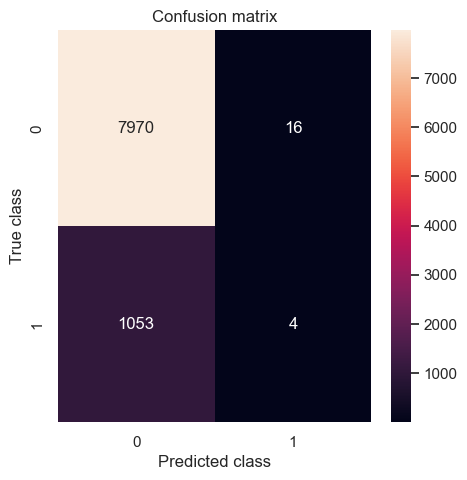

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7986
           1       0.20      0.00      0.01      1057

    accuracy                           0.88      9043
   macro avg       0.54      0.50      0.47      9043
weighted avg       0.80      0.88      0.83      9043



In [378]:
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [379]:
lr_y_pred = model.predict(X_test)

# Exactitud (accuracy)
accuracy = accuracy_score(y_test, lr_y_pred)

# Precisión
precision = precision_score(y_test, lr_y_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, lr_y_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, lr_y_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, lr_y_pred)

# Crear un dataframe con los resultados
metricas2_df = pd.DataFrame({'Modelo': ["Logistic Regression"] ,'Exactitud': [round(accuracy*100,2)], 'Precisión': [round(precision*100,2)], 'Sensibilidad': [round(recall*100,2)], 'Especificidad': [round(specificity*100,2)], 'F1 Score': [round(f1*100,2)]})


metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,Logistic Regression,88.18,20.0,0.38,99.8,0.74


Ya tenemos el primer resultado de un modelo básico de Regresión logística.

> Probramos con DecisionTreeClassifier

In [380]:
def run_model(X_train_res, X_test, y_train_res, y_test):
    dtc = DecisionTreeClassifier(ccp_alpha=0.007, class_weight='balanced', criterion='entropy', max_depth=100,min_samples_leaf=4)
    dtc =  dtc.fit(X_train_res, y_train_res)
    return dtc

In [381]:
model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'class_weight': [None, 'balanced', {0: 1, 1: 5}, 'balanced_subsample'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.007],
}

scorer = make_scorer(recall_score, average='macro')

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
best_recall = grid_search.best_score_

print(f"Best Model: {best_model}")
print(f"Best Cross-Validated Recall Score: {best_recall}")

Best Model: DecisionTreeClassifier(ccp_alpha=0.007, random_state=42)
Best Cross-Validated Recall Score: 0.454366909622648


In [382]:
def run_model(X_train_res, X_test, y_train_res, y_test):
    dtc = DecisionTreeClassifier(ccp_alpha=0.00007 , class_weight='balanced', random_state=42)
    dtc =  dtc.fit(X_train_res, y_train_res)
    return dtc

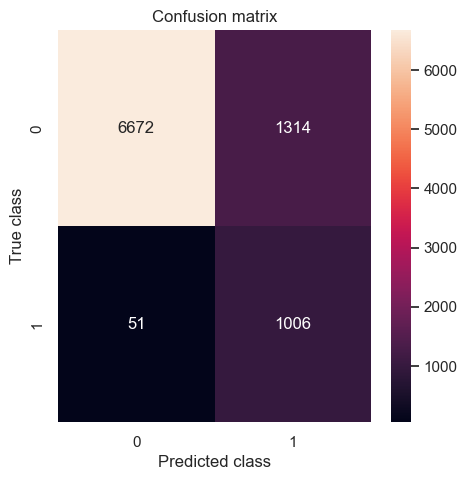

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7986
           1       0.43      0.95      0.60      1057

    accuracy                           0.85      9043
   macro avg       0.71      0.89      0.75      9043
weighted avg       0.93      0.85      0.87      9043



In [383]:
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [384]:
print('Training Score:', model.score(X_train_res, y_train_res))
print('Test Score:', model.score(X_test, y_test))

Training Score: 0.848921803528643
Test Score: 0.8490545173062037


***Comentarios:***

- Podemos ver que al modelo le fue ligeramente mejor en el dataset de test

In [385]:
dtc = dtc = DecisionTreeClassifier(ccp_alpha=0.000074 , class_weight='balanced', min_samples_leaf=1, max_leaf_nodes=None)
dtc.fit(X_train_res, y_train_res)
dtc_pred = dtc.predict(X_test)

# Exactitud (accuracy) 
accuracy = accuracy_score(y_test, dtc_pred)

# Precisión
precision = precision_score(y_test, dtc_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, dtc_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, dtc_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, dtc_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Decision Tree Classifier"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,Logistic Regression,88.18,20.00,0.38,99.80,0.74
1,Decision Tree Classifier,83.92,41.73,94.80,82.48,57.95


Obtuvimos buen recall, pero estamos por debajo del 95%. Vamos a probar con Random Forest Classifier

In [386]:
def run_model(X_train_res, X_test, y_train_res, y_test):
    rfc = RandomForestClassifier(ccp_alpha=0.007, criterion='entropy',class_weight='balanced_subsample',random_state=42)
    rfc =  rfc.fit(X_train_res, y_train_res)
    return rfc

In [387]:
def run_model(X_train_res, X_test, y_train_res, y_test, n_folds=5):
    rfc = RandomForestClassifier(ccp_alpha=0.005, criterion='entropy', class_weight='balanced',min_samples_leaf=4 ,max_leaf_nodes=18,max_depth=100, random_state=42)
    rfc.fit(X_train_res, y_train_res)
    
   
    cv_scores = cross_val_score(rfc, X_train_res, y_train_res, cv=n_folds, scoring='recall')

   
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Cross-Validation Score: {cv_scores.mean()}")
    print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std()}")
    

    test_score = rfc.score(X_test, y_test)
    print(f"Test Score: {test_score}")
    
    return rfc


model = run_model(X_train_res, X_test, y_train_res, y_test)


Cross-Validation Scores: [0.05179616 0.27401838 0.66944908 0.95158598 0.79465776]
Mean Cross-Validation Score: 0.5483014715419601
Standard Deviation of Cross-Validation Scores: 0.33459088446465385
Test Score: 0.685834347008736


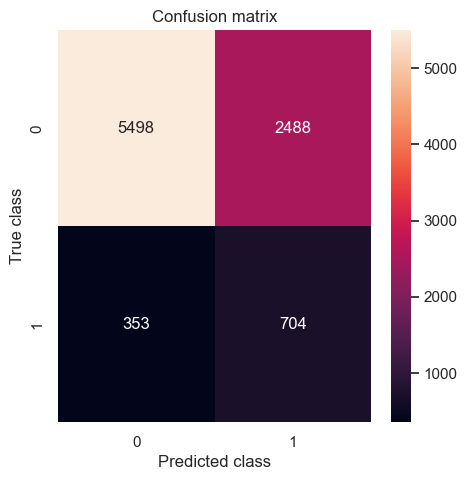

              precision    recall  f1-score   support

           0       0.94      0.69      0.79      7986
           1       0.22      0.67      0.33      1057

    accuracy                           0.69      9043
   macro avg       0.58      0.68      0.56      9043
weighted avg       0.86      0.69      0.74      9043



In [388]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [389]:
print('Training Score:', model.score(X_train_res, y_train_res))
print('Test Score:', model.score(X_test, y_test))

Training Score: 0.6890873448050534
Test Score: 0.685834347008736


In [390]:
rfc = RandomForestClassifier(ccp_alpha=0.005, criterion='entropy', class_weight='balanced',min_samples_leaf=4 ,max_leaf_nodes=18,max_depth=100, random_state=42)
rfc.fit(X_train_res, y_train_res)
rfc_pred = rfc.predict(X_test)

# Exactitud (accuracy) 
accuracy = accuracy_score(y_test, rfc_pred)

# Precisión
precision = precision_score(y_test, rfc_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, rfc_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, rfc_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, rfc_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Random Forest Classifier"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,Logistic Regression,88.18,20.00,0.38,99.80,0.74
1,Decision Tree Classifier,83.92,41.73,94.80,82.48,57.95
2,Random Forest Classifier,68.58,22.06,66.60,68.85,33.14


Con Random Forest no nos fue tan bien, sigamos con Gradient Boosting Classifier

In [391]:
def run_model(X_train_res, X_test, y_train_res, y_test, n_folds=5):
    gbc = GradientBoostingClassifier(loss='exponential', learning_rate=0.5, n_estimators=100, max_depth=10, random_state=42)
    gbc.fit(X_train_res, y_train_res)
    
    cv_scores = cross_val_score(gbc, X_train_res, y_train_res, cv=n_folds, scoring='recall')

    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Cross-Validation Score: {cv_scores.mean()}")
    print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std()}")
    
    test_score = gbc.score(X_test, y_test)
    print(f"Test Score: {test_score}")
    
    return gbc


model = run_model(X_train_res, X_test, y_train_res, y_test)

Cross-Validation Scores: [0.25898079 0.15121136 0.21035058 0.33806344 0.93322204]
Mean Cross-Validation Score: 0.37836564142688384
Standard Deviation of Cross-Validation Scores: 0.28410236077686474
Test Score: 0.9942496958973792


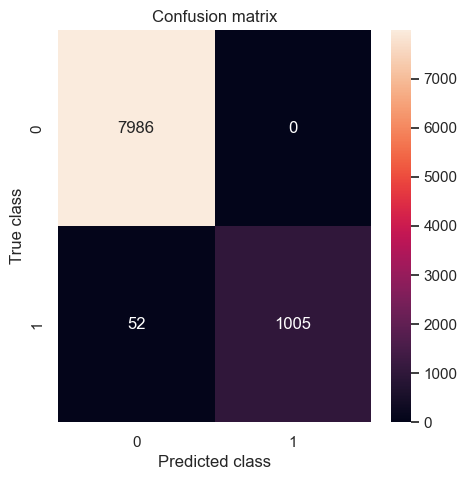

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7986
           1       1.00      0.95      0.97      1057

    accuracy                           0.99      9043
   macro avg       1.00      0.98      0.99      9043
weighted avg       0.99      0.99      0.99      9043



In [392]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [393]:
print('Training Score:', model.score(X_train_res, y_train_res))
print('Test Score:', model.score(X_test, y_test))

Training Score: 0.9941842735787411
Test Score: 0.9942496958973792


In [394]:
gbc = GradientBoostingClassifier(loss='exponential', learning_rate=0.5, n_estimators=120, max_depth=12, random_state=42)
gbc.fit(X_train_res, y_train_res)
gbc_pred = gbc.predict(X_test)

# Exactitud (accuracy) 
accuracy = accuracy_score(y_test, gbc_pred)

# Precisión
precision = precision_score(y_test, gbc_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, gbc_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, gbc_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, gbc_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Gradient Boosting Classifier"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,Logistic Regression,88.18,20.00,0.38,99.80,0.74
1,Decision Tree Classifier,83.92,41.73,94.80,82.48,57.95
2,Random Forest Classifier,68.58,22.06,66.60,68.85,33.14
3,Gradient Boosting Classifier,99.98,99.91,99.91,99.99,99.91


Con Gradient Boosting Obtuvimos buenos resultados, a su vez, recibió un mejor puntaje en test.

In [395]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold

In [396]:
def create_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [397]:
def run_keras_model(X_train_res, X_test, y_train_res, y_test):
    input_shape = (X_train_res.shape[1],)  # Shape of input data
    
    # Create the neural network model
    model = create_model(input_shape)
    
    history = model.fit(X_train_res, y_train_res, epochs=6, batch_size=86, verbose=0, 
                        validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=6)])
    
    # Evaluate the model on the test set
    y_test_pred_probs = model.predict(X_test)
    y_test_pred = np.argmax(y_test_pred_probs, axis=1)  # Obtener las clases predichas
    
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy}")

    # Precisión
    precision = precision_score(y_test, y_test_pred)

    # Sensibilidad (recall)
    recall = recall_score(y_test, y_test_pred)

    # Especificidad
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    specificity = tn / (tn + fp)

    # F1 Score
    f1 = f1_score(y_test, y_test_pred)

    nuevas_metricas = pd.DataFrame({'Modelo': ["Red Neuronal"],
                                    'Exactitud': [round(test_accuracy*100,2)], 
                                    'Precisión': [round(precision*100,2)], 
                                    'Sensibilidad': [round(recall*100,2)], 
                                    'Especificidad': [round(specificity*100,2)], 
                                    'F1 Score': [round(f1*100,2)]})

    return model, history, nuevas_metricas


model, history, metricas_nuevas = run_keras_model(X_train_res, X_test, y_train_res, y_test)

metricas2_df = metricas2_df.append(metricas_nuevas, ignore_index=True)

metricas2_df


283/283 [==============================] - 0s 1ms/step
Test Accuracy: 0.8831140108371116


,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,Logistic Regression,88.18,20.00,0.38,99.80,0.74
1,Decision Tree Classifier,83.92,41.73,94.80,82.48,57.95
2,Random Forest Classifier,68.58,22.06,66.60,68.85,33.14
3,Gradient Boosting Classifier,99.98,99.91,99.91,99.99,99.91
4,Red Neuronal,88.31,0.00,0.00,100.00,0.00


In [398]:
from sklearn.ensemble import VotingClassifier

# Crear los clasificadores base
decision_tree_clf = DecisionTreeClassifier(random_state=42)
random_forest_clf = RandomForestClassifier(random_state=42)
gradient_boosting_clf = GradientBoostingClassifier(random_state=42)

# Crear el modelo de ensamble con VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('decision_tree', decision_tree_clf),
        ('random_forest', random_forest_clf),
        ('gradient_boosting', gradient_boosting_clf)
    ],
    voting='hard'  # 'hard' para votación por mayoría, 'soft' para votación ponderada
)

# Entrenar el modelo de ensamble
ensemble_model.fit(X_train_res, y_train_res)

# Predecir con el modelo de ensamble en el conjunto de prueba
ensemble_pred = ensemble_model.predict(X_test)

# Exactitud (accuracy)
accuracy = accuracy_score(y_test, ensemble_pred)

# Precisión
precision = precision_score(y_test, ensemble_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, ensemble_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, ensemble_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, ensemble_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Ensemble Model (DTC, RFC, GBC)"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,Logistic Regression,88.18,20.00,0.38,99.80,0.74
1,Decision Tree Classifier,83.92,41.73,94.80,82.48,57.95
2,Random Forest Classifier,68.58,22.06,66.60,68.85,33.14
3,Gradient Boosting Classifier,99.98,99.91,99.91,99.99,99.91
4,Red Neuronal,88.31,0.00,0.00,100.00,0.00
5,"Ensemble Model (DTC, RFC, GBC)",99.99,100.00,99.91,100.00,99.95


In [399]:
print('Training Score:', ensemble_model.score(X_train_res, y_train_res))
print('Test Score:', ensemble_model.score(X_test, y_test))

Training Score: 0.9998257460248312
Test Score: 0.9998894172287958


In [408]:
lr = LogisticRegression(penalty='l2', C=1, solver='lbfgs',random_state=42)
lr =  lr.fit(X_train_res, y_train_res)

In [415]:
models= [lr,dtc, rfc, gbc]

In [416]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, X, y): #Toma los modelos ya fiteados
    fig, ax = plt.subplots(figsize=(5,5))
    for model in models:
        y_score = model.predict_proba(X)[:,1]  
        fpr, tpr, thresholds = roc_curve(y, y_score)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        
    ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('Tasa de Falsos Positivos')
    ax.set_ylabel('Tasa de Verdaderos Positivos')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc='lower right')
    plt.show()

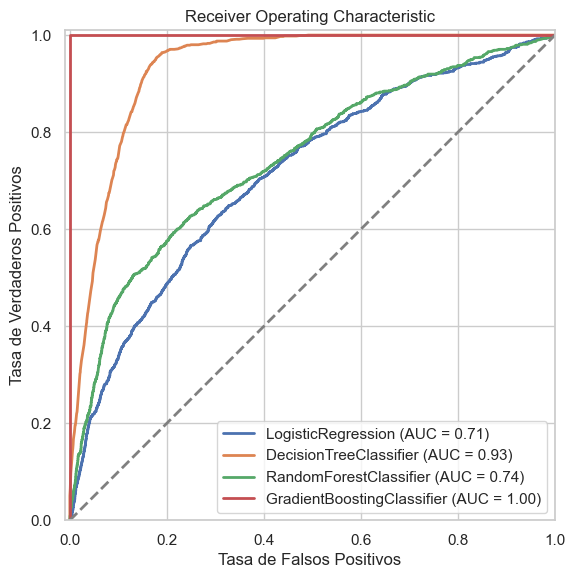

In [417]:
plot_roc_curves(models,X_test,y_test)

Con esto ya nos queda claro que el método de ensamble (de Decision Tree, Random Forest y Gradian Boosting) es el modelo que mejor interpreta los datos y que recibe el mayor score. Además no demuestra overfitting ya que el score en test es mayor que en training. Aprovecha lo mejor de los tres modelos, aunque en su mayoría es Gradient Boosting Classifier quien da tan buenos resultados.